In [1]:
import requests
from lxml import html
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
url = 'https://www.investing.com/news/latest-news'
headers = {'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36(KHTML, like Gecko) Chrome/91.0.4472.124'}
response = requests.get(url, headers=headers)
if response.status_code == 200:
 page_content = response.content
else:
 print(f"Ошибка при получении страницы: {response.status_code}")
 exit()

In [3]:
tree = html.fromstring(page_content)
tree


<Element html at 0x7befa58c8e50>

In [39]:
headers = tree.xpath('//div[@class="news-analysis-v2_content__z0iLP w-full text-xs sm:flex-1"]/a/text()')
descriptions = tree.xpath('//div[@class="news-analysis-v2_content__z0iLP w-full text-xs sm:flex-1"]/p/text()')
sources = tree.xpath('//div[@class="flex flex-wrap items-center text-2xs"]/span[@data-test="news-provider-name"]/text()')
timestamps = tree.xpath('//div[@class="flex flex-wrap items-center text-2xs"]/time[@data-test="article-publish-date"]/text()')

In [14]:
data = {
 'headline': headers,
 'description': descriptions,
 'source': sources,
 'timestamp': timestamps
}
df = pd.DataFrame(data)
df

,headline,description,source,timestamp
0,Top 5 things to watch in markets in the week a...,Investing.com -- This week’s U.S. inflation da...,Investing.com,5 hours ago
1,5 big analyst AI moves: JPMorgan sees signific...,Investing.com -- Here are the biggest analyst ...,Investing.com,7 hours ago
2,Street calls of the week,Investing.com -- Here is your Pro Recap of the...,Investing.com,7 hours ago
3,Analysis-Year of war creates cracks in Israel'...,"By Libby George, Karin Strohecker and Steven ...",Reuters,24 minutes ago
4,Trump appears before large crowd at site of as...,"By Steve Holland BUTLER, Pennsylvania (Reuter...",Reuters,37 minutes ago
5,Chinese hackers breached US court wiretap syst...,(Reuters) -Chinese hackers accessed the netwo...,Reuters,1 hour ago
6,Where does the AI semiconductor ecosystem go f...,Investing.com -- The trajectory of the AI semi...,Investing.com,4 hours ago
7,German government expects economy to shrink by...,FRANKFURT (Reuters) - Germany's economy minis...,Reuters,4 hours ago
8,Israel stocks lower at close of trade; TA 35 d...,Investing.com – Israel stocks were lower after...,Investing.com,5 minutes ago
9,Republican House Speaker Mike Johnson refuses ...,By Kanishka Singh WASHINGTON (Reuters) - Repu...,Reuters,15 minutes ago


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   headline     21 non-null     object
 1   description  21 non-null     object
 2   source       21 non-null     object
 3   timestamp    21 non-null     object
dtypes: object(4)
memory usage: 800.0+ bytes


In [15]:
df.describe()

,headline,description,source,timestamp
count,21,21,21,21
unique,21,21,2,15
top,Top 5 things to watch in markets in the week a...,Investing.com -- This week’s U.S. inflation da...,Reuters,1 hour ago
freq,1,1,15,5


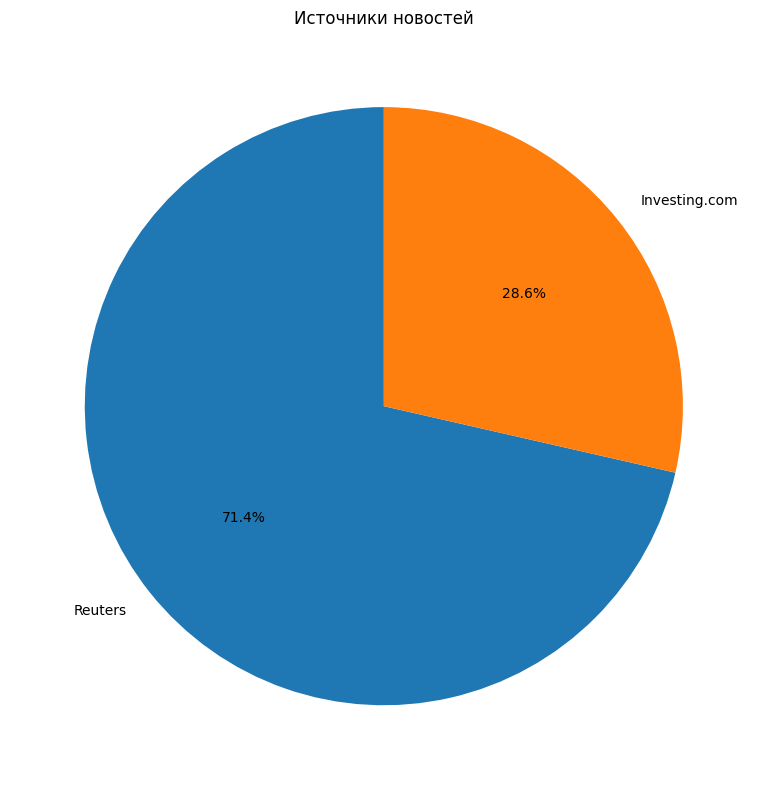

In [34]:
plt.figure(figsize=(8, 8))
plt.pie(df['source'].value_counts(), labels=df['source'].value_counts().index, autopct='%1.1f%%', startangle=90)
plt.title('Источники новостей')
plt.tight_layout()
plt.show()

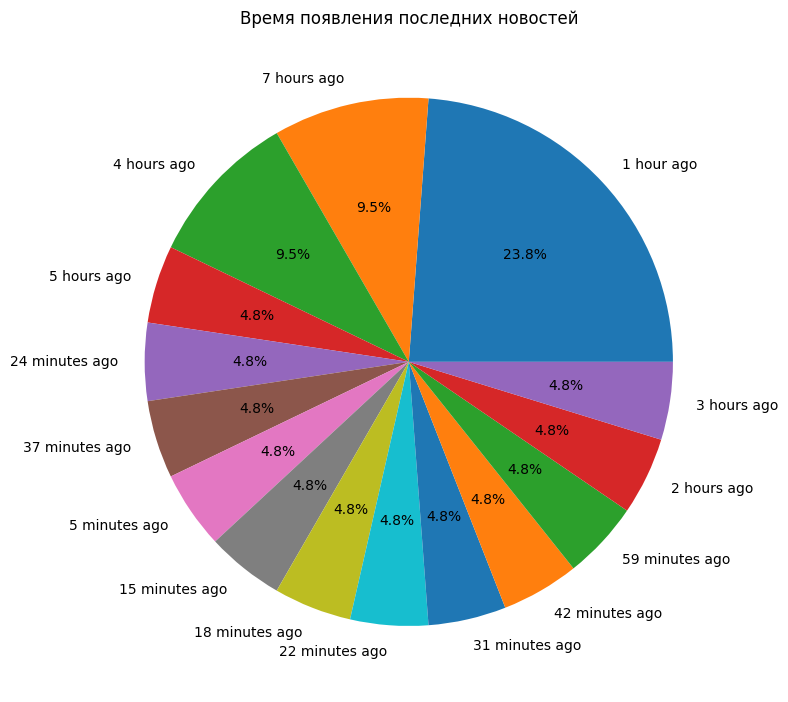

In [38]:
plt.figure(figsize=(8, 8))
plt.pie(df['timestamp'].value_counts(), labels=df['timestamp'].value_counts().index, autopct='%1.1f%%')
plt.title('Время появления последних новостей')
plt.tight_layout()
plt.show()